<a href="https://colab.research.google.com/github/ptz204/ds-class-project-2021/blob/main/dsclass_oct29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!git clone https://github.com/ptz204/ds-class-project-2021
%cd ds-class-project-2021/

Cloning into 'ds-class-project-2021'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.
/content/ds-class-project-2021/ds-class-project-2021


# 1. Data Pre-processing

In [19]:
import pandas as pd
import seaborn as sns

In [20]:
data_path = "./data/SpotifyFeatures.csv"
d = pd.read_csv(data_path)
df = pd.DataFrame(data=d)
display(df.head(5), df.describe())

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Opera,Giuseppe Verdi,"Stiffelio, Act III: Ei fugge! … Lina, pensai c...",7EsKYeHtTc4H4xWiTqSVZA,21,0.986,0.313,490867,0.23100,0.000431,C#,0.0964,-14.287,Major,0.0547,86.001,4/4,0.0886
1,Opera,Giacomo Puccini,Madama Butterfly / Act 1: ... E soffitto e pareti,7MfmRBvqaW0I6UTxXnad8p,18,0.972,0.360,176797,0.20100,0.028000,D#,0.1330,-19.794,Major,0.0581,131.798,4/4,0.3690
2,Opera,Giacomo Puccini,"Turandot / Act 2: Gloria, gloria, o vincitore",7pBo1GDhIysyUMFXiDVoON,10,0.935,0.168,266184,0.47000,0.020400,C,0.3630,-8.415,Major,0.0383,75.126,3/4,0.0696
3,Opera,Giuseppe Verdi,"Rigoletto, Act IV: Venti scudi hai tu detto?",02mvYZX5aKNzdqEo6jF20m,17,0.961,0.250,288573,0.00605,0.000000,D,0.1200,-33.440,Major,0.0480,76.493,4/4,0.0380
4,Opera,Giuseppe Verdi,"Don Carlo / Act 4: ""Ella giammai m'amò!""",03TW0jwGMGhUabAjOpB1T9,19,0.985,0.142,629760,0.05800,0.146000,D,0.0969,-23.625,Major,0.0493,172.935,4/4,0.0382


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,228159.000000,228159.000000,228159.000000,2.281590e+05,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000,228159.000000
mean,44.209130,0.351200,0.554198,2.366092e+05,0.580967,0.137310,0.214638,-9.354658,0.122442,117.423062,0.444795
std,17.276599,0.351385,0.183949,1.166787e+05,0.260577,0.292447,0.196977,5.940994,0.186264,30.712458,0.255397
min,0.000000,0.000001,0.056900,1.550900e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000
25%,33.000000,0.030900,0.437000,1.862530e+05,0.405000,0.000000,0.097700,-11.287000,0.036800,92.734000,0.232000
50%,47.000000,0.205000,0.570000,2.211730e+05,0.618000,0.000037,0.128000,-7.515000,0.050600,115.347000,0.430000
75%,57.000000,0.689000,0.690000,2.648400e+05,0.793000,0.023400,0.263000,-5.415000,0.109000,138.887000,0.643000
max,100.000000,0.996000,0.987000,5.552917e+06,0.999000,0.999000,1.000000,1.585000,0.967000,239.848000,1.000000


# 1.1 Artist Popularity

In [21]:
artist = df.groupby(['artist_name']).sum().sort_values(by='popularity', ascending=False)
display(artist.head(5))

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
artist_name,,,,,,,,,,,
Drake,31703,93.260066,316.096,116141548,266.820,3.099511,99.6669,-3856.222,113.3354,57529.231,171.6347
Chris Brown,22047,41.894164,251.407,89377672,238.328,0.021477,58.4486,-2481.568,44.4065,45572.893,188.2914
Gorillaz,21809,38.904888,248.397,84749342,273.129,67.975969,90.4658,-2571.056,33.6847,46696.936,226.2840
Red Hot Chili Peppers,21674,28.176358,181.756,88618970,272.573,16.049444,57.2798,-1821.780,23.8296,41051.073,166.7240
Linkin Park,20962,17.842294,187.650,74859976,288.728,10.600432,87.3181,-1738.013,26.6364,41938.470,153.0807


In [28]:
count = df.groupby(['artist_name']).count().sort_values(by='track_id', ascending=False).reset_index()
count = count[['artist_name','track_id']]
count = count.rename(columns={"track_id": "song_count"})
display(count)

,artist_name,song_count
0,Giuseppe Verdi,1394
1,Giacomo Puccini,1137
2,Richard Wagner,804
3,Wolfgang Amadeus Mozart,800
4,Randy Newman,757
...,...,...
13313,Lost Immigrants,1
13314,Lost Horizon,1
13315,Lossapardo,1
13316,Los3,1


In [26]:
df2 = artist.merge(count, left_on='artist_name', right_on='artist_name')
display(df2.sort_values(by='song_count', ascending=False))

,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count
10,Giuseppe Verdi,18580,1330.979000,425.7761,344114030,221.339480,169.783522,362.7316,-28175.900,96.1431,140096.253,256.1542,1394
19,Giacomo Puccini,16376,1092.427000,293.7235,258661521,209.169810,164.622330,281.0961,-20412.311,61.9506,112237.008,155.7211,1137
81,Richard Wagner,10413,754.145000,174.8342,305808581,125.117219,352.308442,187.2476,-16619.972,44.3575,75129.053,76.7019,804
13,Wolfgang Amadeus Mozart,17785,769.482000,257.6289,271899465,96.059240,439.144784,161.7496,-17812.061,46.1827,86223.997,214.4025,800
52,Randy Newman,12639,609.887300,300.9019,118551845,168.374160,321.218582,151.3470,-12169.983,44.4265,82093.426,201.3279,757
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10986,KXNG Crooked,48,0.024600,0.6340,196056,0.697000,0.000000,0.1770,-7.658,0.3460,180.217,0.4190,1
10987,Frank Iero And The Patience,48,0.000107,0.4900,140040,0.837000,0.003260,0.0746,-5.683,0.0658,90.000,0.4210,1
10988,Los Afro Brothers,48,0.117000,0.7090,183627,0.859000,0.000001,0.0826,-2.748,0.1290,176.245,0.8750,1
10989,Michael Naura Quartet,48,0.886000,0.4680,357573,0.388000,0.362000,0.1070,-12.389,0.0275,112.455,0.1250,1


In [31]:
df2['popularity_norm'] = df2['popularity'] / df2['song_count']
display(df2.sort_values(by="popularity_norm", ascending=False).reset_index())

,index,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
0,7059,Pedro Capó,174,0.52200,1.563,418266,1.40700,0.000000,0.2233,-9.549,0.0999,253.825,1.3110,2,87.0
1,9147,Mario Bautista,85,0.02750,0.804,218470,0.70500,0.000138,0.2020,-5.272,0.1990,103.009,0.4500,1,85.0
2,7199,Mau y Ricky,166,0.16490,1.444,460053,1.42300,0.000003,0.3990,-9.024,0.4020,345.986,1.4850,2,83.0
3,5939,Paloma Mami,246,1.38100,2.488,557580,1.91400,0.018607,0.2674,-19.822,0.3880,292.213,1.0450,3,82.0
4,9226,Ninho,82,0.67800,0.663,157076,0.68500,0.000000,0.1220,-6.163,0.1630,137.834,0.3120,1,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13313,13305,Karl Leury,0,0.16300,0.833,232267,0.49500,0.000002,0.0850,-8.889,0.0699,99.998,0.5450,1,0.0
13314,13304,Tonic Sol-Fa,0,1.03200,2.119,495240,2.25600,0.000000,0.3769,-19.644,0.2537,324.047,2.8140,3,0.0
13315,13303,Les Hérissons,0,12.50275,18.212,4925067,14.91240,0.357013,3.7900,-183.086,2.7843,3099.797,19.2000,25,0.0
13316,13302,Peter Schickele,0,4.86900,1.391,1331942,0.51972,2.235700,0.4856,-103.787,0.2123,562.360,1.1131,5,0.0


In [32]:
top_popularity = df2.sort_values(by="popularity", ascending=False).iloc[:30].reset_index()

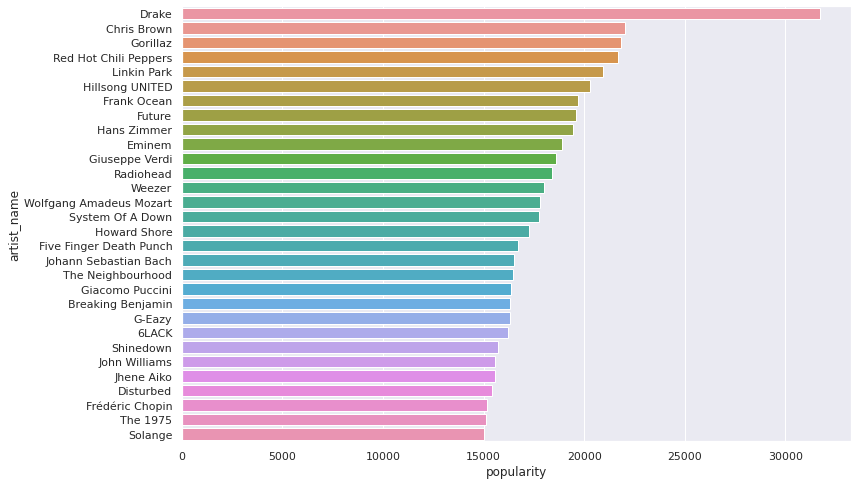

In [12]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(x="popularity", y="artist_name", data=top_popularity)

In [49]:
top_popularity_norm = df2.sort_values(by="popularity_norm", ascending=False).iloc[:30].reset_index()

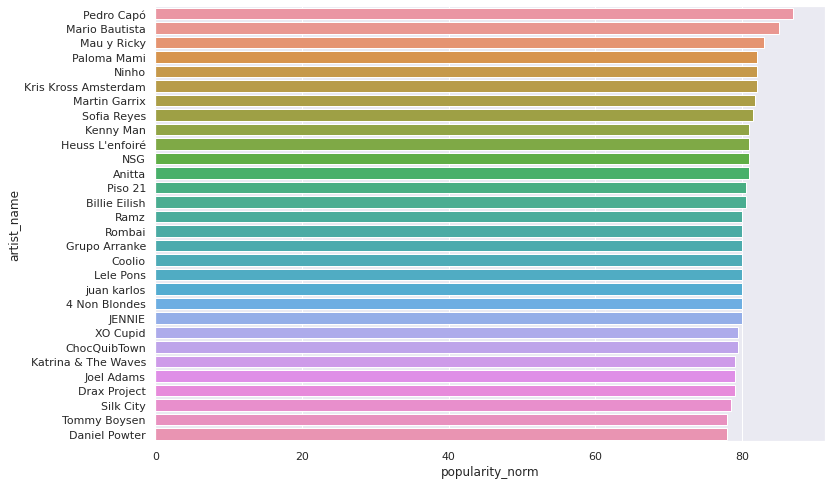

In [34]:
sns.barplot(x="popularity_norm", y="artist_name", data=top_popularity_norm)

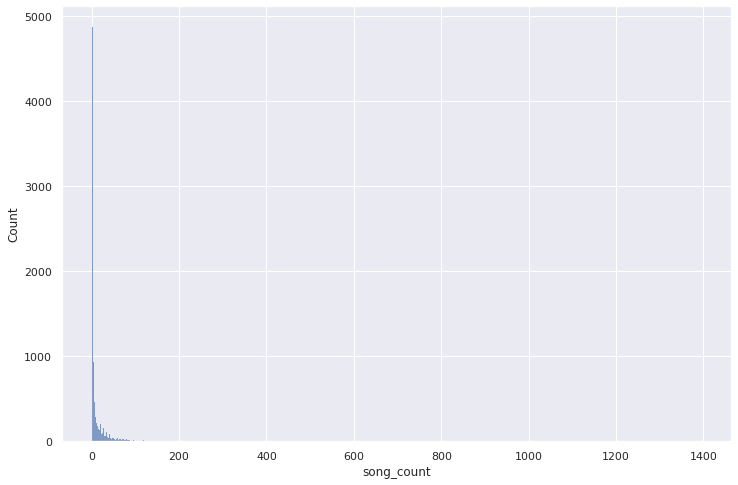

In [15]:
sns.histplot(data=df2, x='song_count')

In [35]:
display(top_popularity.describe(), top_popularity_norm.describe(), df2.describe())

,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,14.500000,18216.833333,214.452639,183.222753,1.055406e+08,190.532489,102.611567,85.148140,-5606.132033,38.189983,48083.601100,129.562803,428.733333,50.436364
std,8.803408,3323.876155,332.483836,73.303870,7.032697e+07,73.716392,157.822310,69.828486,6805.854700,25.327099,24798.181417,59.120067,261.724643,15.634637
min,0.000000,15040.000000,0.460886,70.180900,4.540978e+07,29.231760,0.021477,35.181400,-28175.900000,13.433300,28510.720000,29.568400,248.000000,13.328551
25%,7.250000,16243.000000,28.364287,136.022225,6.537501e+07,135.930550,4.524545,51.324750,-7913.877250,19.138750,34383.561250,88.856950,281.500000,38.107361
50%,14.500000,17530.000000,71.330316,167.267500,7.798985e+07,198.232905,11.276142,62.240100,-2432.012000,29.136900,40217.230000,121.944000,314.500000,57.077280
75%,21.750000,19552.250000,284.695382,214.812200,1.207575e+08,250.145750,150.374575,89.678875,-1727.256500,45.933175,46415.925250,164.352250,456.750000,60.778374
max,29.000000,31703.000000,1330.979000,425.776100,3.441140e+08,296.692000,439.144784,362.731600,-954.180000,113.335400,140096.253000,256.154200,1394.000000,66.463312


,index,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
count,30.000000,30.000000,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,7574.300000,228.366667,0.701480,1.944900,5.974855e+05,1.836700,0.041981,0.523657,-18.655833,0.298570,365.513700,1.505853,2.833333,80.659127
std,2188.704343,320.670901,1.709122,2.692061,8.307158e+05,2.307911,0.193181,0.840979,34.188601,0.523387,559.133444,1.985147,3.992090,1.911903
min,1646.000000,78.000000,0.009370,0.450000,1.570760e+05,0.381000,0.000000,0.059800,-186.175000,0.029700,70.231000,0.235000,1.000000,78.000000
25%,7094.000000,80.000000,0.153050,0.707000,1.903178e+05,0.692500,0.000000,0.108500,-15.119250,0.072650,112.295250,0.555250,1.000000,79.625000
50%,8255.500000,120.500000,0.341000,0.979000,3.557430e+05,0.989500,0.000009,0.245500,-8.525000,0.118900,191.189500,0.932000,1.500000,80.000000
75%,9287.500000,172.000000,0.630000,1.602750,5.426192e+05,1.568500,0.000127,0.408750,-5.311250,0.267475,277.253500,1.451000,2.000000,81.375000
max,9334.000000,1610.000000,9.547060,13.190000,4.071208e+06,9.562000,1.051060,3.752000,-2.836000,2.253000,2480.309000,10.327000,20.000000,87.000000


,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
count,13318.000000,13318.000000,13318.000000,1.331800e+04,13318.000000,13318.000000,13318.000000,13318.000000,13318.000000,13318.000000,13318.000000,13318.000000,13318.000000
mean,757.374305,6.016634,9.494305,4.053501e+06,9.952907,2.352338,3.677103,-160.260512,2.097637,2011.648032,7.620056,17.131626,44.503176
std,1666.528278,26.234638,19.750354,1.016096e+07,21.379984,14.010899,9.978847,593.577453,7.427411,4565.877024,16.074468,40.208007,13.409479
min,0.000000,0.000003,0.060000,4.166700e+04,0.000953,0.000000,0.018300,-28175.900000,0.022800,36.970000,0.017800,1.000000,0.000000
25%,61.000000,0.324249,0.802000,3.726620e+05,0.780000,0.000042,0.237000,-133.178250,0.090400,174.851000,0.718000,2.000000,36.000000
50%,196.000000,1.047500,2.580000,1.055968e+06,2.440500,0.016196,0.765050,-38.514500,0.313250,528.434000,2.039600,4.000000,45.638182
75%,683.750000,4.192000,8.921925,3.713120e+06,8.901250,0.881000,2.880650,-14.017500,1.219800,1858.766000,7.197475,16.000000,54.000000
max,31703.000000,1330.979000,425.776100,3.441140e+08,296.692000,439.144784,362.731600,1.683000,195.888000,140096.253000,305.102700,1394.000000,87.000000


In [92]:
df2[df2['song_count']==df2['song_count'].max()]


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
10,Giuseppe Verdi,18580,1330.979,425.7761,344114030,221.33948,169.783522,362.7316,-28175.9,96.1431,140096.253,256.1542,1394,13.328551


In [103]:
df2[df2['artist_name']=="Wolfgang Amadeus Mozart"]


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
13,Wolfgang Amadeus Mozart,17785,769.482,257.6289,271899465,96.05924,439.144784,161.7496,-17812.061,46.1827,86223.997,214.4025,800,22.23125


In [48]:
df2[df2['song_count'] <= 2]


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
7059,Pedro Capó,174,0.52200,1.5630,418266,1.4070,0.000000,0.2233,-9.549,0.0999,253.825,1.3110,2,87.0
7199,Mau y Ricky,166,0.16490,1.4440,460053,1.4230,0.000003,0.3990,-9.024,0.4020,345.986,1.4850,2,83.0
7262,Sofia Reyes,163,0.33000,1.5840,403052,1.7900,0.000000,0.1002,-6.224,0.1178,189.936,1.5880,2,81.5
7264,Kenny Man,162,0.65500,1.6090,387893,1.4320,0.000777,0.6830,-11.714,0.2659,209.961,1.8290,2,81.0
7307,4 Non Blondes,160,0.32000,1.1220,590986,1.1100,0.000000,0.2280,-19.468,0.0574,268.738,0.9940,2,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,Peter Savelli,0,0.00293,0.5800,207760,0.6810,0.000255,0.1260,-7.146,0.0438,74.928,0.5750,1,0.0
13310,Bajka,0,0.16900,0.6610,294307,0.5090,0.022500,0.1050,-8.305,0.0390,80.002,0.5390,1,0.0
13313,Richard Danielpour,0,1.92600,0.5554,1127435,0.1579,1.231000,0.2356,-46.672,0.0828,220.497,0.3664,2,0.0
13314,Cindy McTee,0,0.98800,0.4200,313360,0.0798,0.863000,0.1890,-19.745,0.0398,146.609,0.1220,1,0.0


In [46]:
df2[df2['song_count']<=df2['song_count'].mean()]


,artist_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,song_count,popularity_norm
2050,Danny Ocean,1276,3.189900,12.5910,3366514,12.1320,0.000000,1.2873,-106.514,2.0447,1812.294,9.1550,17,75.058824
2137,Manuel Turizo,1217,7.801000,12.5630,3647753,9.9600,0.000020,3.0655,-117.540,1.6168,1930.946,11.3420,17,71.588235
2192,Harry Styles,1172,3.413218,8.4760,4214835,10.0730,0.007863,2.7328,-96.936,0.5790,2055.071,6.3530,17,68.941176
2242,Nina Nesbitt,1137,6.840000,10.7300,3488505,7.6700,0.000000,1.4301,-118.582,1.0107,2052.977,7.9346,17,66.882353
2249,The Verve,1132,2.446000,6.3310,5135937,11.2620,0.000432,3.5620,-117.191,0.5669,1794.036,4.9830,16,70.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13312,Esa-Pekka Salonen,0,2.643000,0.5593,2105279,0.3606,1.515200,0.4470,-76.691,0.1515,270.898,0.3293,3,0.000000
13313,Richard Danielpour,0,1.926000,0.5554,1127435,0.1579,1.231000,0.2356,-46.672,0.0828,220.497,0.3664,2,0.000000
13314,Cindy McTee,0,0.988000,0.4200,313360,0.0798,0.863000,0.1890,-19.745,0.0398,146.609,0.1220,1,0.000000
13315,Choeurs,0,6.840700,3.2020,2343988,2.5590,0.024932,2.6410,-133.518,1.0353,870.672,2.9960,8,0.000000


In [60]:
corr = df3[df3.columns[1:]].corr()['popularity_song'][:]
display(corr)

popularity_song      1.000000
acousticness        -0.422083
danceability         0.294233
duration_ms         -0.041150
energy               0.277652
instrumentalness    -0.230042
liveness            -0.203147
loudness             0.413276
speechiness         -0.194673
tempo                0.114957
valence              0.119224
popularity_artist    0.136051
popularity_norm      0.880056
Name: popularity_song, dtype: float64

# 1.2 Song Popularity

In [52]:
df3 = df.merge(df2[['artist_name', 'popularity', 'popularity_norm']], left_on='artist_name', right_on='artist_name')
df3 = df3.rename(columns={"popularity_x": "popularity_song", "popularity_y": "popularity_artist"})
display(df3.sort_values(by="popularity_song", ascending=False))

,genre,artist_name,track_name,track_id,popularity_song,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_artist,popularity_norm
22994,Pop,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.3210,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.3190,10315,72.640845
23064,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.5780,0.725,178640,0.3210,0.000000,C#,0.0884,-10.744,Minor,0.3230,70.142,4/4,0.3190,10315,72.640845
73500,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.1630,0.833,149520,0.5390,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.3850,6463,76.035294
23063,Dance,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.5540,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.3350,10315,72.640845
22993,Pop,Ariana Grande,"break up with your girlfriend, i'm bored",4kV4N9D1iKVxx1KLvtTpjS,99,0.0421,0.726,190440,0.5540,0.000000,F,0.1060,-5.290,Minor,0.0917,169.999,4/4,0.3350,10315,72.640845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139951,Classical,Johann Sebastian Bach,"St. Matthew Passion, BWV 244, Pt. 2: No. 50, S...",56GhVQSM5L7c2LDEZ0rRsc,0,0.9760,0.420,108067,0.2440,0.000027,A#,0.7210,-17.710,Minor,0.0494,105.315,4/4,0.4490,16508,26.120253
39109,Soul,Sister Sledge,All American Girls,5ymTzCIHG1xfpqiuqxeGwi,0,0.0268,0.747,283827,0.7500,0.000000,A,0.3950,-7.037,Minor,0.0531,120.693,4/4,0.9430,641,49.307692
139950,Classical,Johann Sebastian Bach,"Cantata ""Gott soll allein mein Herze haben"", B...",4SFhtK9GB1gr6nIdhEmded,0,0.9730,0.379,50013,0.1530,0.000002,F#,0.1100,-13.238,Major,0.0474,93.097,3/4,0.1310,16508,26.120253
143564,Classical,Wolfgang Amadeus Mozart,"Die Zauberflöte, K. 620, Act II: O Isis und Os...",6LmJ8EApr66fwyQtfTbPn4,0,0.9780,0.113,191733,0.0416,0.680000,D,0.1090,-24.661,Major,0.0394,59.750,4/4,0.0557,17785,22.231250


In [57]:
df3.groupby(['track_id']).count().sort_values(by='genre', ascending=False).reset_index()


,track_id,genre,artist_name,track_name,popularity_song,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_artist,popularity_norm
0,0wY9rA9fJkuESyYm9uzVK5,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
1,6sVQNUvcVFTXvlk3ec0ngd,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
2,0UE0RhnRaEYsiYgXpyLoZc,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
3,3R73Y7X53MIQZWnKloWq5i,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
4,6AIte2Iej1QKlaofpjCzW1,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153680,2vSlMB2G0PHhFbc9suwups,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
153681,2vSfpEvqxlJVQAjAzpsZAw,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
153682,2vSRhHiMYXeBKGoK7uNeMq,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
153683,2vSQ9NSh7eiU6uxeqSBXiu,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [58]:
df3[df3['track_id']=="0wY9rA9fJkuESyYm9uzVK5"]


,genre,artist_name,track_name,track_id,popularity_song,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity_artist,popularity_norm
64722,Alternative,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,66,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64732,Pop,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64733,R&B,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64736,Children’s Music,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,66,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64737,Anime,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,66,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64761,Blues,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,66,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64767,Rap,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64772,Hip-Hop,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64778,Indie,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308
64784,Soul,SiR,D'Evils,0wY9rA9fJkuESyYm9uzVK5,67,0.00558,0.784,171818,0.586,0.000286,C#,0.106,-3.417,Major,0.187,132.169,4/4,0.656,4149,53.192308


In [ ]:
# To do tmr
# Align on cleaning data + popularity
# After clean, apply multiple linear regression with stats models, run diagnostics
# Run logistics regression, DT, RF, KNN etc, copy assignment code